# _Deep Learning_ for Malware Detection

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRUnZTUVy4D21rB2MOImQ8C5DX3PHJfkqRAbOfrjP2vE8GgIGRuodk7ubwqg_n30P2VcYs&usqp=CAU)

Source: [Classifying Malware Images with Convolutional Neural Network Models](https://arxiv.org/abs/2010.16108)

**Malware** (a.k.a.,**malicious software**) is any software intentionally designed to cause disruption to a computer, server, client, or computer network, leak private information, gain unauthorized access to information or systems, deprive users access to information or which unknowingly interferes with the user's computer security and privacy.

Malware detection is **the process of scanning the computer and files to detect malware**. This process may involve multiple tools and approaches (_one of them being machine learning_).


## Binary 2 Image

**A binary file is one that is not readable by eye _- not in ASCII or UTF8, not in HTML or XML, or a programming language like Python -_. So a malware binary is typically a malicious executable file.**

**It is possible to convert binary files into images, something that allows us to use some of the classification techniques that we use in deep learning to aid in malware classification and detection.**

Below we are using `Binary to Image Converter`, a tool provided by [_Necmettin Çarkacı_](https://github.com/ncarkaci/binary-to-image).


In [1]:
import os

os.system("python binar2image.py executable")


0

**Interestingly, non-malware software has (_generally_) a different image signature than malware. Something we can use to our advantage!**


**Image representation of the binary code of a (*harmless*) malware.**

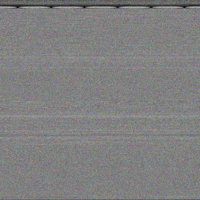

**Image representation of the binary code of a *benign executable* (the *Media Player Classic* installer).**

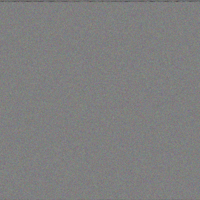

In [1]:
from IPython.display import display, Markdown
from PIL import Image as Image

image = Image.open('executable\RGB\\funny_RGB.png')
image = image.resize((200, 200))

display(Markdown('**Image representation of the binary code of a (*harmless*) malware.**'))
display(image)

image = Image.open('executable\RGB\Media Player Classic_RGB.png')
image = image.resize((200, 200))

display(Markdown('**Image representation of the binary code of a *benign executable* (the *Media Player Classic* installer).**'))
display(image)


**The malware used as an example is a simple executable. It does not generate any damage to the system in question. It just (1) creates a series of empty folders/directories entitled "hahaha", (2) opens the [teeny-tiny_castle](https://github.com/Nkluge-correa/teeny-tiny_castle) repository in your browser, and (3) makes a copy of itself on the parent directory.** **_Harmless fun,_ but "malware behavior nonetheless.**

**If you are interested in exploring different types of malware, [theZoo](https://github.com/ytisf/theZoo) is a project created to make the possibility of malware analysis open and available to the public.** ☣️

**However**, _citing the authors of the zoo:_

> "Please remember that these are live and dangerous malware! They come encrypted and locked for a reason! Do NOT run them unless you are absolutely sure of what you are doing! They are to be used only for educational purposes (and we mean that!) !!!"

**Fortunately, we have more secure options for ML enthusiasts interested in working with cybersecurity.**


## Virus-MNIST: A Benchmark Malware Dataset

![virus-MNITS](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZ30EL6vKg5KyZvXWFZgLpYOntUG7YWCluB3wCV8MiTxJckPNJHialAPl5xUy5wKCIRTc&usqp=CAU)

**Virus-MNIST is an image classification dataset consisting of 10 classes of Portable Executables (PE) and approximately 50,000 virus examples. The malicious classes include 9 families of computer viruses and one benign set.**

**The Virus-MNIST dataset presents 9-virus classes, clusterized based on _byte-similarities_, converted to grey-scale thumbnail image (32 x 32), plus a nonmalicious class ("0").** This dataset was created form the [Malware Analysis Datasets](https://www.kaggle.com/datasets/ang3loliveira/malware-analysis-datasets-raw-pe-as-image), orginally developed for binary classification (_Malware_ vs _Not-Malware_). The malware samples were originally downloaded from [virusshare](https://virusshare.com/), while harmless PE samples were downloaded from [portableapps](https://portableapps.com/) and from [Windows 7 x86 directories](https://www.microsoft.com/en-us/download/details.aspx?id=42559).

**This dataset can be downloaded [here](https://www.kaggle.com/datasets/datamunge/virusmnist/download?datasetVersionNumber=1).**

_Credits to:_ [David Noever](https://arxiv.org/search/cs?searchtype=author&query=Noever%2C+D), [Samantha E. Miller Noever](https://arxiv.org/search/cs?searchtype=author&query=Noever%2C+S+E+M)


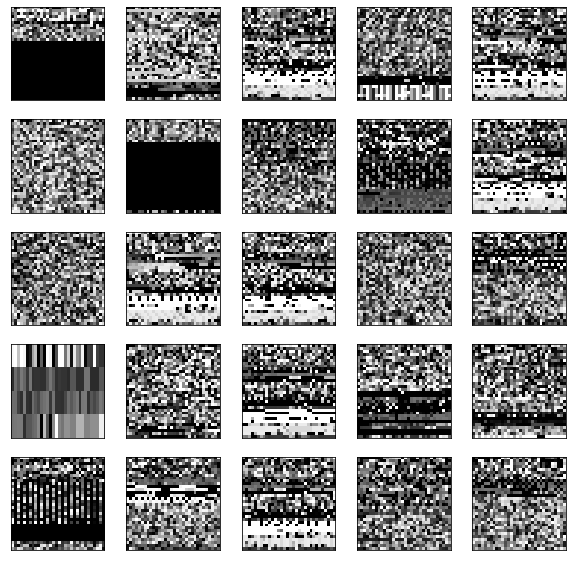

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train = pd.read_csv('virus_MNIST\\train.csv')
test = pd.read_csv('virus_MNIST\\test.csv')

x_train, y_train = np.array(train.drop(
    ['label', 'hash'], axis=1)).T, np.array(train['label'])
x_test, y_test = np.array(
    test.drop(['label', 'hash'], axis=1)).T, np.array(test['label'])

x_train = x_train / 255.
x_test = x_test / 255.

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.gray()
    plt.imshow(x_train[:, i, None].reshape(
        (32, 32)) * 255, interpolation='nearest')
plt.show()


**All Virus-MNIST samples are identified with a hash. The hashes can be used to search for information about these samples.**

To search for information about possible malware you can use [VirusTotal](https://www.virustotal.com/gui/home/search). VirusTotal is a search engine designed to _"analyze suspicious files, domains, IPs and URLs to detect malware and other breaches, automatically share them with the security community."_ VirusTotal aggregates many antivirus products and online scan engines called Contributors.

According to que authors of the Virus-MNIST:

- _We attempted to assign dominant families to each derived cluster based on the known MD5 hashes but found multiple names and sample diversity when querying [VirusTotal](https://www.virustotal.com/gui/home/search). To reduce the number of code changes comparing a larger or smaller multi-class problem with existing MNIST infrastructure, we opted to use the assigned 9-cluster result as a fully unsupervised example._

You can access the hashes for each sample by simply selecting the `'hash'` column in the dataset.


In [2]:
print(list(train['hash'].head(21)))


['aa527b5aea9fe96fabae78e85ba59491', '05597db8265479234c8e15a7290cd7f0', 'b1375b03e66c56e9a733eaf3d2a5bdbd', '78ccbc945556b3f2aefd13f6ca31dcde', '0748ba9db029cbfa01d73d2ee45222bf', '7b46c5c2165c4b8c43c36806438ac944', '74f7d466e2946c9fd0d7b585aa2714ab', '1eddcd2fda6db9ddc7fad0656b43fddd', '1643e682c86880cdf6a84976893c319b', '642199345e7ce4b58158cdddfa35504a', '8ec48b06970d9165890440877c77d514', '7463817f8839e6a131aa9d7fa7b590dd', 'e53295659a7c9c3b99dcb0340ecb9499', '60447a716b161d016391448da47f7180', '951edbb498184e7a4f2ce4b7a26a1fcf', '58d1b463d333813b8a3b42341e856cbf', '6ad3cafd1cec551bf62f8be57ac4dca0', '7600150e173a0f923ccb2c0723e8cf8a', '47de35c097983dd2b444d1abfa9fcde4', '42537e1718c11671bfa6b5aade3e2afa', 'b39be4529e3653caeb2cc2f934072727']


If you want to automate a VirusTotal search, you can use the API provided by VirusTotal. You just need to [register on their site](https://www.virustotal.com/gui/join-us) and you will receive an API Key that will allow you to make scan calls on the platform.

Below we are using a scann script created by [MitulNarotam](https://github.com/MitulNarotam) to automate a VirusTotal search. The search returns several results from different anti-virus services with a diagnosis on the sample in question.


In [6]:
from IPython.display import display, HTML
os.system(f"python scanner.py -H {train['hash'][666]} -o result.txt")

with open("result.txt", "rb") as file:
    try:
        file.seek(-2, os.SEEK_END)
        while file.read(1) != b'\n':
            file.seek(-2, os.SEEK_CUR)
    except OSError:
        file.seek(0)
    last_line = file.readline().decode()
display(f'Scan result: {last_line}')
display(HTML("Full info in <a href='result.txt' target='_blank'>here</a>."))


'Scan result: 4434a160bd15e617135f064a89b4d0af is a malicious hash. Hit Count:57\r\n'

**We will use a dimensionality reduction technique and unsupervised learning to build the 10-class cluster as proposed by the authors of Virus-MNIST.**

**Dimensionality reduction**, or **dimension reduction**, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its [intrinsic dimension](https://en.wikipedia.org/wiki/Intrinsic_dimension "Intrinsic dimension").

One of the techniques we use to do that is PCA (Principal component analysis). The **principal components** of a collection of points in a [real coordinate space](https://en.wikipedia.org/wiki/Real_coordinate_space "Real coordinate space") are a sequence of $p$ [unit vectors](https://en.wikipedia.org/wiki/Unit_vector "Unit vector"), where the $i$-th vector is the direction of a line that best fits the data while being [orthogonal](https://en.wikipedia.org/wiki/Orthogonal "Orthogonal") to the first $i - 1$ vectors. Here, a best-fitting line is defined as one that minimizes the average squared [distance from the points to the line](https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line "Distance from a point to a line").

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA "sklearn.decomposition.PCA") is implemented as a _transformer_ object that learns n components in its `fit` method, and can be used on new data to project it on these components.

![pca](https://i.gifer.com/H7zW.gif)


In [9]:
import plotly.io as pio
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

df = train.drop(['hash'], axis=1)
df_small = df[:10000]

pca_70 = PCA(n_components=70)
pca_result_70 = pca_70.fit_transform(df_small.iloc[:, 0:1024].values)
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=500)
tsne_pca70_results = tsne.fit_transform(pca_result_70)

pio.renderers.keys()
pio.renderers.default = 'jupyterlab'

colors = df_small['label'].replace(
    {0: 'Not-Malware', 1: 'Adware',
     2: 'Trojan_1', 3: 'Trojan_2',
     4: 'Installer', 5: 'Backdoor_1',
     6: 'Crypto', 7: 'Backdoor_2',
     8: 'Downloader', 9: 'Heuristic'}
)

fig = px.scatter_3d(
    tsne_pca70_results, x=0, y=1, z=2, color=colors,
    labels={'0': 't-SNE 1', '1': 't-SNE 2', '2': 't-SNE 3'}
)
fig.update_layout(template='plotly_dark',
                  title=f't-SNE with 100 components ranked by PCA - Total Explained Variance: {round(pca_70.explained_variance_ratio_.sum() * 100, 2)}%',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)')
fig.show()


c:\Users\CWLINK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\CWLINK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 1.850s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.583298
[t-SNE] KL divergence after 500 iterations: 1.418209


**As we can see, the " Not-Malware" class is surrounded by Malware classes. This can be due to the fact that (often) malware is built to impersonate legitimate software (e.g. by copying the header of legitimate PEs).**

**The classes of malwares can be described as follows:**

- Not-Malware: _(obviously) non-malware PEs._
- Adware: _a form of malware that hides on your device and serves you advertisements._.
- Trojan_1: _a type of malware that downloads onto a computer disguised as a legitimate program._
- Trojan_2: _Same as Trojan_1, but with some different features (there are several types of trojans)._
- Installer: _malware that installs code (and possibly other malware, e.g. keyloggers) on a system._
- Backdoor_1: _malware that gives access to the victim's machine, bypassing encripion and other forms of security._
- Crypto: _type of ransomware virus that encrypts files on a compromised device and demands a ransom in exchange for decryption keys._
- Backdoor_2: _Same as Backdoor_1, but with some different features (there are several types of backdoor)._
- Downloader: _a type of malware whose functionality is to download other programs (malware) onto the affected machine._
- Heuristic: _a type of malware that can disable antivirus software, modify security settings, and install additional malicious software onto a machine._


## Building a Malware Detector with _Deep Learning_

**We will test two different types of networks, a dense network that takes as imput the flattened data in a 1D vector, and a CNN that takes as input the Virus-MNIST images, zoomed to a resolution of 150 x 150.**


In [3]:
# Hyperparameters

import tensorflow as tf
HIDDEN_LAYER_01 = 128
HIDDEN_LAYER_02 = 128
LEARNING_RATE = 0.001
L1 = 0.001
L2 = 0.001
EPOCHS = 50
BATCH = 128
NUM_CLASS = 10

# Keras_NN_virus_flat


regularizer = tf.keras.regularizers.l1_l2(l1=L1, l2=L2)

model_flat = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=x_train.T[0].shape),
                                         tf.keras.layers.Dense(
                                             HIDDEN_LAYER_01, activation='relu', kernel_regularizer=regularizer),
                                         tf.keras.layers.Dense(
                                             HIDDEN_LAYER_02, activation='relu', kernel_regularizer=regularizer),
                                         tf.keras.layers.Dense(NUM_CLASS, activation='softmax')])

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model_flat.compile(optimizer=opt,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])


model_flat.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 149,002
Trainable params: 149,002
Non-trainable params: 0
_________________________________________________________________


In [4]:
x_val = x_train.T[:10000]
partial_x_train = x_train.T[0:38422]

y_val = y_train[:10000]
partial_y_train = y_train[0:38422]

print('Training...\n')
print("Nº GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
history = model_flat.fit(partial_x_train, partial_y_train, epochs=EPOCHS,
                         batch_size=BATCH, validation_data=(x_val, y_val), verbose=1)
print('\nEvaluating...\n')
test_loss_score, test_acc_score = model_flat.evaluate(x_test.T, y_test)
print(f'Final Loss: {round(test_loss_score, 2)}.')
print(f'Final Performance: {round(test_acc_score * 100, 2)} %.')
model_flat.save('Pre_trained_virus\Pre_trained_virus_flat.h5')


Training...

Nº GPUs Available:  1
Epoch 1/50
301/301 [==============================] - 2s 3ms/step - loss: 2.7668 - accuracy: 0.7613 - val_loss: 1.3110 - val_accuracy: 0.8466
Epoch 2/50
301/301 [==============================] - 1s 3ms/step - loss: 1.0910 - accuracy: 0.8585 - val_loss: 0.9348 - val_accuracy: 0.8829
Epoch 3/50
301/301 [==============================] - 1s 3ms/step - loss: 0.8438 - accuracy: 0.8806 - val_loss: 0.7310 - val_accuracy: 0.8996
Epoch 4/50
301/301 [==============================] - 1s 3ms/step - loss: 0.7122 - accuracy: 0.8908 - val_loss: 0.6457 - val_accuracy: 0.8962
Epoch 5/50
301/301 [==============================] - 1s 3ms/step - loss: 0.6292 - accuracy: 0.8973 - val_loss: 0.5892 - val_accuracy: 0.9027
Epoch 6/50
301/301 [==============================] - 1s 3ms/step - loss: 0.5782 - accuracy: 0.9029 - val_loss: 0.5449 - val_accuracy: 0.9097
Epoch 7/50
301/301 [==============================] - 1s 3ms/step - loss: 0.5515 - accuracy: 0.9014 - val_loss: 0

In [5]:
import plotly.express as px
from sklearn.metrics import confusion_matrix
classes = [
    'Not-Malware',
    'Adware',
    'Trojan_1',
    'Trojan_2',
    'Installer',
    'Backdoor_1',
    'Crypto',
    'Backdoor_2',
    'Downloader',
    'Heuristic'
]

predictions = model_flat.predict(x_test.T)


matrix = confusion_matrix(y_test, predictions.argmax(axis=1))

fig = px.imshow(matrix,
                labels=dict(x="Predicted", y="True label"),
                x=classes,
                y=classes,
                text_auto=True
                )
fig.update_xaxes(side='top')
fig.update_layout(template='plotly_dark',
                  title='Confusion Matrix',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)')

fig.show()


109/109 [==============================] - 0s 2ms/step


**As we can see, the classifier is good at differentiating families of malware, but not efficient at distinguishing benign software from malware.**


**Here we are using the `ImageDataGenerator` utility from the `Tensor Flow/Keras` library to create a data stream from the directory where the images are stored (_Virus-MNIST provides data in CSV and JPG_) to our CNN. Now, we are also indtroducing a data augmentation step in our training.**

- _Data augmentation are techniques used to increase the amount of data by adding slightly modified copies of already existing data (or newly created synthetic data) to our dataset._


In [1]:
# Hyperparameters

from keras import layers, models
from tensorflow import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
CHANNELS_LAYER_01 = 32
CHANNELS_LAYER_02 = 64
DENSE_LAYER = 512
LEARNING_RATE = 0.001
DROP_OUT = 0.5
EPOCHS = 50
GENERATOR_STEP = 100
BATCH = 128
GENERATOR_BATCH_SIZE = 32
NUM_CLASS = 10
IMG_SIZE = 32, 32
INPUT_SHAPE = 32, 32, 1

# Generators

train_dir = 'virus_MNIST\\train'
test_dir = 'virus_MNIST\\test'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE),
    batch_size=GENERATOR_BATCH_SIZE,
    color_mode="grayscale",
    class_mode='sparse')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE),
    batch_size=GENERATOR_BATCH_SIZE,
    color_mode="grayscale",
    class_mode='sparse')

for data_batch, labels_batch in train_generator:
    print('Training batch size', data_batch.shape)
    print('Label batch size:', labels_batch.shape)
    break

for data_batch, labels_batch in test_generator:
    print('Test batch size', data_batch.shape)
    print('Label batch size:', labels_batch.shape)
    break

# Keras_CNN_virus


model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(CHANNELS_LAYER_01, (3, 3),
              activation='relu', input_shape=(INPUT_SHAPE)))
model_cnn.add(layers.Conv2D(CHANNELS_LAYER_01, (3, 3), activation='relu'))
model_cnn.add(layers.Dropout(DROP_OUT))

model_cnn.add(layers.Conv2D(CHANNELS_LAYER_02, (3, 3), activation='relu'))
model_cnn.add(layers.Conv2D(CHANNELS_LAYER_02, (3, 3), activation='relu'))
model_cnn.add(layers.Dropout(DROP_OUT))

model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(DENSE_LAYER, activation='relu'))
model_cnn.add(layers.Dense(DENSE_LAYER, activation='relu'))
model_cnn.add(layers.Dropout(DROP_OUT))
model_cnn.add(layers.Dense(NUM_CLASS, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model_cnn.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()


Found 48422 images belonging to 10 classes.
Found 3458 images belonging to 10 classes.
Training batch size (32, 32, 32, 1)
Label batch size: (32,)
Test batch size (32, 32, 32, 1)
Label batch size: (32,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                   

In [2]:
print('Training...\n')
print("Nº GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
history = model_cnn.fit(
    train_generator,
    steps_per_epoch=GENERATOR_STEP,
    epochs=EPOCHS,
    verbose=1
)
print('\nEvaluating...\n')
test_loss_score, test_acc_score = model_cnn.evaluate(test_generator)
print(f'Final Loss: {round(test_loss_score, 2)}.')
print(f'Final Performance: {round(test_acc_score * 100, 2)} %.')
model_cnn.save_weights('Pre_trained_virus\Pre_trained_virus_CNN.h5')


Training...

Nº GPUs Available:  1
Epoch 1/50
100/100 [==============================] - 8s 38ms/step - loss: 1.7451 - accuracy: 0.3938
Epoch 2/50
100/100 [==============================] - 4s 35ms/step - loss: 1.2556 - accuracy: 0.5881
Epoch 3/50
100/100 [==============================] - 4s 35ms/step - loss: 1.0469 - accuracy: 0.6578
Epoch 4/50
100/100 [==============================] - 4s 35ms/step - loss: 0.9768 - accuracy: 0.6694
Epoch 5/50
100/100 [==============================] - 4s 36ms/step - loss: 0.9695 - accuracy: 0.6737
Epoch 6/50
100/100 [==============================] - 3s 34ms/step - loss: 0.9336 - accuracy: 0.6847
Epoch 7/50
100/100 [==============================] - 4s 42ms/step - loss: 0.9077 - accuracy: 0.6963
Epoch 8/50
100/100 [==============================] - 4s 42ms/step - loss: 0.9009 - accuracy: 0.6969
Epoch 9/50
100/100 [==============================] - 4s 43ms/step - loss: 0.8467 - accuracy: 0.7113
Epoch 10/50
100/100 [==============================] - 4

**Training this model can be a bit time-consuming if you don't have access to a GPU, but you can download the weights from the available pre-trained model and use it.**


In [6]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import pandas as pd
import numpy as np

train = pd.read_csv('virus_MNIST\\train.csv')
test = pd.read_csv('virus_MNIST\\test.csv')

train_dir = 'virus_MNIST\\train'
test_dir = 'virus_MNIST\\test'

CHANNELS_LAYER_01 = 32
CHANNELS_LAYER_02 = 64
DENSE_LAYER = 512
LEARNING_RATE = 0.001
DROP_OUT = 0.5
EPOCHS = 50
GENERATOR_STEP = 100
BATCH = 128
GENERATOR_BATCH_SIZE = 32
NUM_CLASS = 10
IMG_SIZE = 32, 32
INPUT_SHAPE = 32, 32, 1


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE),
    batch_size=GENERATOR_BATCH_SIZE,
    color_mode="grayscale",
    class_mode='sparse')


model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(CHANNELS_LAYER_01, (3, 3),
              activation='relu', input_shape=(INPUT_SHAPE)))
model_cnn.add(layers.Conv2D(CHANNELS_LAYER_01, (3, 3), activation='relu'))
model_cnn.add(layers.Dropout(DROP_OUT))

model_cnn.add(layers.Conv2D(CHANNELS_LAYER_02, (3, 3), activation='relu'))
model_cnn.add(layers.Conv2D(CHANNELS_LAYER_02, (3, 3), activation='relu'))
model_cnn.add(layers.Dropout(DROP_OUT))

model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(DENSE_LAYER, activation='relu'))
model_cnn.add(layers.Dense(DENSE_LAYER, activation='relu'))
model_cnn.add(layers.Dropout(DROP_OUT))
model_cnn.add(layers.Dense(NUM_CLASS, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model_cnn.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.load_weights('Pre_trained_virus\Pre_trained_virus_CNN.h5')

test_loss_score, test_acc_score = model_cnn.evaluate(test_generator)
print(f'Final Loss: {round(test_loss_score, 2)}.')
print(f'Final Performance: {round(test_acc_score * 100, 2)} %.')


Found 3458 images belonging to 10 classes.
109/109 [==============================] - 3s 9ms/step - loss: 0.6622 - accuracy: 0.7773
Final Loss: 0.66.
Final Performance: 77.73 %.


In [7]:
import plotly.express as px
from sklearn.metrics import confusion_matrix
classes = [
    'Not-Malware',
    'Adware',
    'Trojan_1',
    'Trojan_2',
    'Installer',
    'Backdoor_1',
    'Crypto',
    'Backdoor_2',
    'Downloader',
    'Heuristic'
]


test_labels = []

for i in range(0, len(test_generator)):
    test_labels.extend(np.array(test_generator[i][1]))

matrix = confusion_matrix(
    test_labels, model_cnn.predict(test_generator).argmax(axis=1))

fig = px.imshow(matrix,
                labels=dict(x="Predicted", y="True label"),
                x=classes,
                y=classes,
                text_auto=True
                )
fig.update_xaxes(side='top')
fig.update_layout(template='plotly_dark',
                  title='Confusion Matrix',
                  coloraxis_showscale=False,
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)')

fig.show()


109/109 [==============================] - 1s 9ms/step


Again, the highest false-negative rate for malware is the "_Not-Malware_," which consistently gets flagged as potential malware. The creators of the [Virus-MNIST](https://arxiv.org/ftp/arxiv/papers/2103/2103.00602.pdf) suggest that this behavior may reflect the:

- _Inexactness of the PE header as an indicator of malware (malware can hijack benign headers to disguise itself)_.
- _The fact that the original clustering excluded the non-malicious samples during the creation of the nine malware families_.
- _The 20:1 ratio between malware and beware (there were only 2500 non-malicious executables included in the Virus-MNIST dataset)_.

In the end, the data made available in CSV results in a more accurate network.


In [32]:
models = [model_flat, model_cnn]

for model in models:
    _, test_acc_score = model.evaluate(test_generator)
    print(f'Model Performance: {round(test_acc_score * 100, 2)} %.')


109/109 [==============================] - 1s 8ms/step - loss: 0.3713 - accuracy: 0.9208
Model Performance: 92.08 %.
109/109 [==============================] - 1s 9ms/step - loss: 0.6622 - accuracy: 0.7773
Model Performance: 77.73 %.


## Exploring PE files with Python

**For future studies, to help in this classification task, we can use other features (besides image representations of malware binary) and classifiers to further help our model through [enssemble learning](https://en.wikipedia.org/wiki/Ensemble_learning).**

**For this, we can also extract from it other useful features to use in a classification problem.**

_In VScode, you can use any extension to display\edit a specified file in hexadecimal (e.g., [Hex Editor](https://github.com/microsoft/vscode-hexeditor))._ You just need to open the specified file with "`Open With --> Hex Editor`"

> _Note: Changing the "e_magic number" is a way to disable executables (e.g., changing de DOS format), macking it more safe to work with them._

![hex-editor](https://raw.githubusercontent.com/microsoft/vscode-hexeditor/main/hex-editor.gif)

**This way, we can explore the contents of a file.exe by looking at its PE structure. To learn more about the PE data structure, this [markdown file](pe_file_structure.md) gives a brief introduction.**

**If looking at hex code is not for you, we have created a `malware_analysis.py` script, which performs the analysis of the PE and exports the main characteristics of the file to a `.txt` file in a _"human-readable format"_. Our program also translates executables into assembly code (_- useful for reverse engineering purposes -_).**

**These features can then be used to create a vector of features that represent possible malware (_- something we can use for classification purposes -_).**


In [7]:
os.system("python malware_analysis.py --path executable\\funny.exe")
display(HTML("Full PE analysis in <a href='pe_dump.txt' target='_blank'>here</a>."))
display(HTML("Analysis Summary in <a href='pe_summary.txt' target='_blank'>here</a>."))
display(HTML("Assembly Code in <a href='assembly_program.asm' target='_blank'>here</a>."))


## CLaMP

**Since we have learned how to extract information from PE files, we will use a dataset created from information coming from this type of analysis: the CLaMP.**

- [ClaMP (Classification of Malware with PE headers)](https://data.mendeley.com/datasets/xvyv59vwvz): contains 5210 samples ($Malware = 2722, Benign = 2488$) of PE file headers, described by 69 features. [Created by Ajit Kumar, K.S.Kuppusamy, and G.Aghila](https://www.sciencedirect.com/science/article/pii/S1319157817300149).

**Diferentes features podem ser extraídas de malwares. Abaixo citamos outros datasets que utilizam de features diferentes.**

- [Mburakergenc_malware_dataset](https://github.com/mburakergenc/Malware-Detection-using-Machine-Learning): contains 100.000 APK (_Android Application Package_) malwares. Each sample having 34 behavioral features (_dataset also available on [Kaggle](https://www.kaggle.com/datasets/nsaravana/malware-detection)_).

- [Malware_api_call_dataset](https://www.kaggle.com/datasets/ang3loliveira/malware-analysis-datasets-api-call-sequences): contains 42,797 malware API call sequences and 1,079 goodware API call sequences (_each API call sequence is composed of the first 100 non-repeated consecutive API calls associated with the parent process_).


In [2]:
import pandas as pd

df = pd.read_csv('ClaMP_Dataset\ClaMP_Integrated-5184.csv')

display(df)


,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,256,4,1,0,1,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,144,3,4,65535,184,184,4,1,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,144,3,4,65535,184,272,5,1,0,1,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,144,3,4,65535,184,184,1,1,0,1,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,144,3,4,65535,184,224,5,1,0,1,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,144,3,4,65535,184,216,5,1,1,1,...,0,5,0,NoPacker,6.174602,3.155928,365568,7.546568,0,1
5206,80,2,4,65535,184,256,7,1,0,1,...,4,3,0,NoPacker,0.000000,0.000000,98816,6.947195,0,1
5207,144,3,4,65535,184,216,5,1,0,1,...,2,3,0,NoPacker,6.503422,3.790871,227328,7.823114,0,1
5208,144,3,4,65535,184,248,5,1,1,1,...,1,4,0,NoPacker,6.115208,7.919091,271616,7.886012,0,1


In [3]:
import plotly.io as pio
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

dff = df.drop(['class', 'packer_type'], axis=1)

pca_35 = PCA(n_components=35)
pca_result_35 = pca_35.fit_transform(dff.values)
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=500)
tsne_pca35_results = tsne.fit_transform(pca_result_35)

pio.renderers.keys()
pio.renderers.default = 'jupyterlab'

colors = df['class'].replace({0: 'Not-Malware', 1: 'Malware'})

fig = px.scatter_3d(
    tsne_pca35_results, x=0, y=1, z=2, color=colors,
    labels={'0': 't-SNE 1', '1': 't-SNE 2', '2': 't-SNE 3'}
)
fig.update_layout(template='plotly_dark',
                  title=f't-SNE with 100 components ranked by PCA - Total Explained Variance: {round(pca_35.explained_variance_ratio_.sum() * 100, 2)}%',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)')
fig.show()


c:\Users\CWLINK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\CWLINK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5210 samples in 0.001s...
[t-SNE] Computed neighbors for 5210 samples in 0.883s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5210
[t-SNE] Computed conditional probabilities for sample 2000 / 5210
[t-SNE] Computed conditional probabilities for sample 3000 / 5210
[t-SNE] Computed conditional probabilities for sample 4000 / 5210
[t-SNE] Computed conditional probabilities for sample 5000 / 5210
[t-SNE] Computed conditional probabilities for sample 5210 / 5210
[t-SNE] Mean sigma: 15186.015326
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.875023
[t-SNE] KL divergence after 500 iterations: 0.469576


**With only half of the features from the PE headers (`pca_result_35`) we are already able to account for 100% of the variance in this dataset.**


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y = df['class']
X = pca_result_35

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(4168, 35) (1042, 35) (4168,) (1042,)


**Now let's test different Machine Learning algorithms:**

- **Logistic Regression (LR)**: _LR is a statistical model that models the probability of one event (out of two alternatives) taking place by having the log-odds (the logarithm of the odds) for the event be a linear combination of one or more independent variables ("predictors")._
- **Random Forest (RF)**: _Random forests or random decision forests is an ensemble learning method for classification, regression, and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees._
- **Gradient Boosting (GB)**: _Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees._
- **Support-vector machine (SVM)**: _SVMs are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. SVM maps training examples to points in space to maximize the width of the gap between the two categories._


In [5]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(penalty='l2')
model_lr.fit(X_train, y_train.values.ravel())
score = model_lr.score(X_test, y_test.values.ravel())
print(f'Accuracy (Logistic Regression): ' +
      '{:.2f}'.format(score * 100) + ' %')


model_rf = RandomForestClassifier(max_depth=3, n_estimators=500)
model_rf.fit(X_train, y_train.values.ravel())
score = model_rf.score(X_test, y_test.values.ravel())
print(f'Accuracy (Random Forest): ' + '{:.2f}'.format(score * 100) + ' %')


model_gbc = GradientBoostingClassifier(n_estimators=100)
model_gbc.fit(X_train, y_train.values.ravel())
score = model_gbc.score(X_test, y_test.values.ravel())
print(f'Accuracy (Gradient Boosting Classifier): ' +
      '{:.2f}'.format(score * 100) + ' %')


model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train.values.ravel())
score = model_svm.score(X_test, y_test.values.ravel())
print(f'Accuracy (Support-vector machine): ' +
      '{:.2f}'.format(score * 100) + ' %')


Accuracy (Logistic Regression): 95.20 %
Accuracy (Random Forest): 93.09 %
Accuracy (Gradient Boosting Classifier): 98.18 %
Accuracy (Support-vector machine): 97.60 %


**The Gradient Boosting Classifier was our winner in this task, achieving 98% accuracy in malware classification by using the top 35 most relevant features in the PE Header dataset (_- not bad at all -_).**


In [6]:
import plotly.express as px
from sklearn.metrics import confusion_matrix

preds = model_gbc.predict(X_test)
matrix = confusion_matrix(y_test, preds).ravel()


fig = px.imshow(matrix.reshape(2, 2),
                labels=dict(x="Predicted", y="True label"),
                x=['Not-Malware', 'Malware'],
                y=['Not-Malware', 'Malware'],
                text_auto=True
                )
fig.update_xaxes(side='top')
fig.update_layout(template='plotly_dark',
                  title='Confusion Matrix',
                  coloraxis_showscale=False,
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)')
fig.show()


---

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).
